## 라이브러리, 데이터 파일 로드

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('/content/drive/MyDrive/ESAA/방학플젝/dataSP25.csv')
test = pd.read_csv('/content/drive/MyDrive/ESAA/방학플젝/compSP25.csv')

In [ ]:
print(train.shape)
print(test.shape)

(27379, 16)
(6847, 15)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27379 entries, 0 to 27378
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              27379 non-null  int64  
 1   name                            27370 non-null  object 
 2   host_id                         27379 non-null  int64  
 3   host_name                       27369 non-null  object 
 4   neighbourhood_group             27379 non-null  object 
 5   neighbourhood                   27379 non-null  object 
 6   latitude                        27379 non-null  float64
 7   longitude                       27379 non-null  float64
 8   room_type                       27379 non-null  object 
 9   price                           27379 non-null  int64  
 10  minimum_nights                  27379 non-null  int64  
 11  number_of_reviews               27379 non-null  int64  
 12  last_review                     

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6847 entries, 0 to 6846
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6847 non-null   int64  
 1   name                            6847 non-null   object 
 2   host_id                         6847 non-null   int64  
 3   host_name                       6843 non-null   object 
 4   neighbourhood_group             6847 non-null   object 
 5   neighbourhood                   6847 non-null   object 
 6   latitude                        6847 non-null   float64
 7   longitude                       6847 non-null   float64
 8   room_type                       6847 non-null   object 
 9   minimum_nights                  6847 non-null   int64  
 10  number_of_reviews               6847 non-null   int64  
 11  last_review                     5472 non-null   object 
 12  reviews_per_month               54

In [ ]:
train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1,Clinton Hill Apartment Single Bedroom ! Pratt ~~,30610258,Santiago,Brooklyn,Clinton Hill,40.69591,-73.96284,Private room,58,2,1,9/23/2018,0.10,1,0
1,2,Andy Phillips,6180052,Andrian,Brooklyn,Fort Greene,40.68769,-73.97490,Private room,99,5,4,9/29/2017,0.17,1,250
2,3,"Stylish, Comfortable, and Affordable in Brooklyn",5957027,Zachary,Brooklyn,Crown Heights,40.67667,-73.91750,Entire home/apt,180,2,126,6/14/2019,3.74,1,74
3,4,15 min train ride to Times Sq and US OPEN,101602599,M,Queens,Woodside,40.74340,-73.90588,Entire home/apt,50,1,95,6/24/2019,5.63,2,0
4,5,Sunny 2 bdrm Park Slope Apt w/ Yard 3min to Su...,106168581,Jason,Brooklyn,South Slope,40.66600,-73.99020,Entire home/apt,210,4,88,7/4/2019,4.41,1,20


## 데이터 설명

https://www.kaggle.com/c/spring-2025-regression-competition/data?select=dataSP25.csv

<유의미해보이지 않아 삭제하는 항목>

id, name, host_id, host_name, reviews_per_month, last_review

## 데이터 전처리

### 1. neighbourhood_group

In [ ]:
# 카테고리 종류, 개수 확인
train['neighbourhood_group'].value_counts()

,count
neighbourhood_group,
Manhattan,12129
Brooklyn,11255
Queens,3190
Bronx,604
Staten Island,201


In [ ]:
# test 데이터에 대하여 동일과정 수행
test['neighbourhood_group'].value_counts()

,count
neighbourhood_group,
Manhattan,3017
Brooklyn,2843
Queens,782
Bronx,157
Staten Island,48


In [ ]:
# neighbourhood_group 비율 확인
# train
print(train['neighbourhood_group'].value_counts()/train.shape[0])
print()
# test
print(test['neighbourhood_group'].value_counts()/test.shape[0])

neighbourhood_group
Manhattan        0.443004
Brooklyn         0.411081
Queens           0.116513
Bronx            0.022061
Staten Island    0.007341
Name: count, dtype: float64

neighbourhood_group
Manhattan        0.440631
Brooklyn         0.415218
Queens           0.114211
Bronx            0.022930
Staten Island    0.007010
Name: count, dtype: float64


매우 흡사함

<ipython-input-9-0d6ef24d9133>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=freq, y=group, palette='Paired')


Text(0, 0.5, 'Neighbourhood_group')

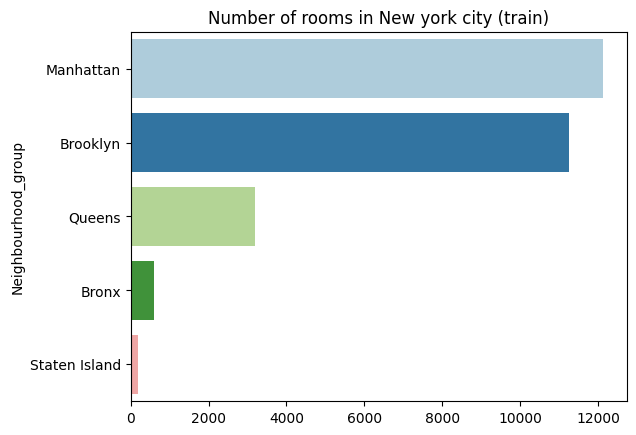

In [ ]:
import seaborn as sns

freq = train['neighbourhood_group'].value_counts().values
group = train['neighbourhood_group'].value_counts().index

ax = sns.barplot(x=freq, y=group, palette='Paired')
ax.set_title('Number of rooms in New york city (train)')
ax.set_ylabel('Neighbourhood_group')

맨하튼과 브루클린에 데이터가 모여있다.

<ipython-input-10-3b7675674dac>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=freq, y=group, palette='Paired')


Text(0, 0.5, 'Neighbourhood_group')

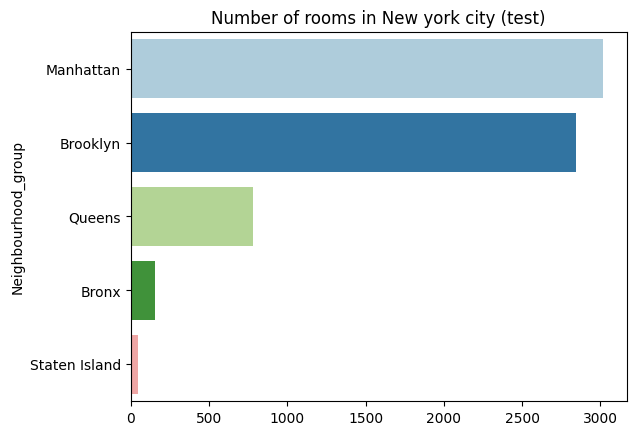

In [ ]:
import seaborn as sns

freq = test['neighbourhood_group'].value_counts().values
group = test['neighbourhood_group'].value_counts().index

ax = sns.barplot(x=freq, y=group, palette='Paired')
ax.set_title('Number of rooms in New york city (test)')
ax.set_ylabel('Neighbourhood_group')

test 데이터 또한 train 데이터와 비슷한 결과가 도출됨

결측치나 오타 등의 수정 사항이 없으므로 추가적인 전처리는 하지 않고 넘어간다.

In [ ]:
# neighbourhood와 neighbourhood_group이 잘 짝지어졌나 확인 > 확인 결과 다 맞게 들어감 (thanks to gpt~)
'''
print(airbnb.loc[airbnb['neighbourhood_group']=='Bronx']['neighbourhood'].unique())
print(airbnb.loc[airbnb['neighbourhood_group']=='Manhattan']['neighbourhood'].unique())
print(airbnb.loc[airbnb['neighbourhood_group']=='Brooklyn']['neighbourhood'].unique())
print(airbnb.loc[airbnb['neighbourhood_group']=='Staten Island']['neighbourhood'].unique())
print(airbnb.loc[airbnb['neighbourhood_group']=='Queens']['neighbourhood'].unique())
'''

"\nprint(airbnb.loc[airbnb['neighbourhood_group']=='Bronx']['neighbourhood'].unique())\nprint(airbnb.loc[airbnb['neighbourhood_group']=='Manhattan']['neighbourhood'].unique())\nprint(airbnb.loc[airbnb['neighbourhood_group']=='Brooklyn']['neighbourhood'].unique())\nprint(airbnb.loc[airbnb['neighbourhood_group']=='Staten Island']['neighbourhood'].unique())\nprint(airbnb.loc[airbnb['neighbourhood_group']=='Queens']['neighbourhood'].unique())\n"

### 2. neighbourhood

In [ ]:
# 분포 출력
train['neighbourhood'].value_counts()

,count
neighbourhood,
Williamsburg,2146
Bedford-Stuyvesant,2066
Harlem,1449
Bushwick,1387
Upper West Side,1104
...,...
Richmondtown,1
Prince's Bay,1
New Dorp,1


이상치 및 결측치인 값은 없는 것으로 보임

### 3. latitude

뉴욕주가 북위 40° 43′ (40.7167°), 서경 74° 00′ (-74.0°)인데 train 데이터 중에서 해당 범위를 벗어난 데이터가 있는지(뉴욕주가 아닌 다른 곳에 위치한 이상치) 확인

In [ ]:
train['latitude'].isnull().sum()

0

In [ ]:
# 뉴욕시 위도 범위 설정 (약 40.4774°에서 40.9176°)
min_latitude = 40.4774
max_latitude = 40.9176

# 범위를 벗어나는 데이터 확인
out_of_range_latitudes = train[(train['latitude'] < min_latitude) | (train['latitude'] > max_latitude)]

# 결과 출력
if not out_of_range_latitudes.empty:
    print(f"There are {len(out_of_range_latitudes)} rows where 'latitude' is out of range.")
    print(out_of_range_latitudes[['latitude', 'longitude']])
else:
    print("All 'latitude' values are within the expected range.")

All 'latitude' values are within the expected range.


벗어나는 이상치 없음 : 모든 데이터가 뉴욕시 내에 존재함

### 4. longitude

In [ ]:
train['longitude'].isnull().sum()

0

In [ ]:
# 경도의 범위 설정 (서경 74° 00′를 기준으로 설정)
min_longitude = -74.25
max_longitude = -73.7

# 범위를 벗어나는 데이터 확인
out_of_range_longitudes = train[(train['longitude'] < min_longitude) | (train['longitude'] > max_longitude)]

# 결과 출력
if not out_of_range_longitudes.empty:
    print(f"There are {len(out_of_range_longitudes)} rows where 'longitude' is out of range.")
    print(out_of_range_longitudes[['latitude', 'longitude']])
else:
    print("All 'longitude' values are within the expected range.")

All 'longitude' values are within the expected range.


벗어나는 이상치 없음 : 모든 데이터가 뉴욕시 내에 존재함

- 위도, 경도 이용해서 지도에 에어비앤비 숙소 위치 표시해보기

In [ ]:
import folium

# 지도 초기화 (중심을 데이터의 평균 위도와 경도로 설정)
center_lat = train['latitude'].mean()
center_lon = train['longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# 데이터포인트 추가
for _, row in train.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,  # 점 크기
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

# Jupyter Notebook에서 지도 표시
m

Output hidden; open in https://colab.research.google.com to view.

### 5. room_type

In [ ]:
train['room_type'].value_counts()

,count
room_type,
Entire home/apt,14254
Private room,12486
Shared room,639


In [ ]:
test['room_type'].value_counts()

,count
room_type,
Entire home/apt,3553
Private room,3134
Shared room,160


<ipython-input-20-a64fc8ae8bb2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq1, y=group1, palette='Paired', ax=ax[0])
<ipython-input-20-a64fc8ae8bb2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq2, y=group2, palette='Paired', ax=ax[1])


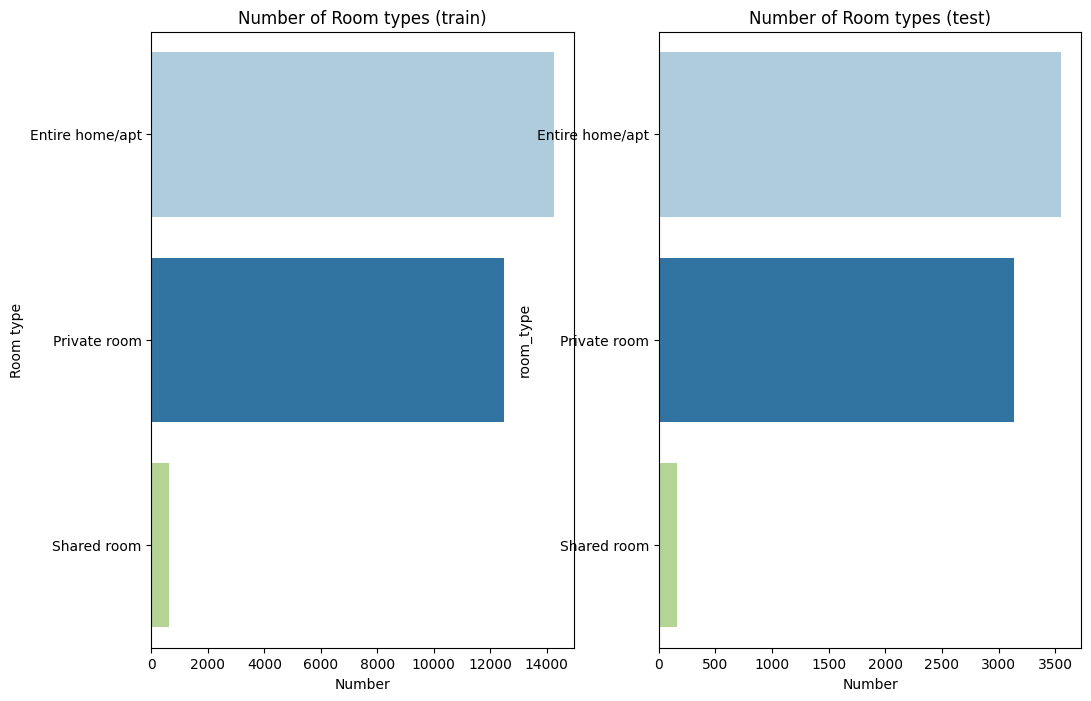

In [ ]:
freq1 = train['room_type'].value_counts().values
group1 = train['room_type'].value_counts().index

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
sns.barplot(x=freq1, y=group1, palette='Paired', ax=ax[0])
ax[0].set_title('Number of Room types (train)')
ax[0].set_xlabel('Number')
ax[0].set_ylabel('Room type')

freq2 = test['room_type'].value_counts().values
group2 = test['room_type'].value_counts().index

sns.barplot(x=freq2, y=group2, palette='Paired', ax=ax[1])
ax[1].set_title('Number of Room types (test)')
ax[1].set_xlabel('Number')
plt.show()

방 전체를 쓰도록 하는 Entire home/apt 타입이 가장 많고, 집 안에 독방을 주는 경우도 비슷하게 많았음. 하지만 룸셰어 형태의 타입은 확연히 적음

전처리 할 사항 보이지 않으므로 전처리 진행 x

### 6. price

In [ ]:
train['price'].describe()

,price
count,27379.000000
mean,151.569561
std,219.807784
min,0.000000
25%,69.000000
50%,105.000000
75%,175.000000
max,10000.000000


결측치는 없으나 최솟값이 0임, 결측치가 0으로 입력되었을 것

최댓값도 10000 (약 천오백만원, 말이 안 됨)

In [ ]:
print(np.sum(train['price']==0))

8


In [ ]:
# 가격이 0인 8개의 행 제거
train = train[train.price != 0]
train.price.describe()

,price
count,27371.000000
mean,151.613861
std,219.824628
min,10.000000
25%,69.000000
50%,105.000000
75%,175.000000
max,10000.000000


<Axes: xlabel='price', ylabel='Count'>

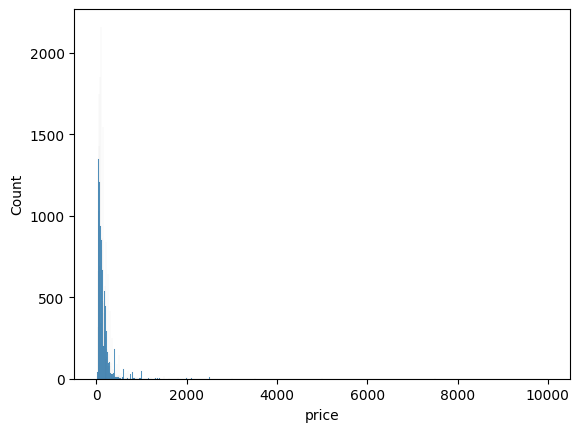

In [ ]:
sns.histplot(train['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e887ce94880>,
 'caps': [<matplotlib.lines.Line2D at 0x7e887ce94d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e887ce94580>],
 'medians': [<matplotlib.lines.Line2D at 0x7e887ce95360>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e887ce95660>],
 'means': []}

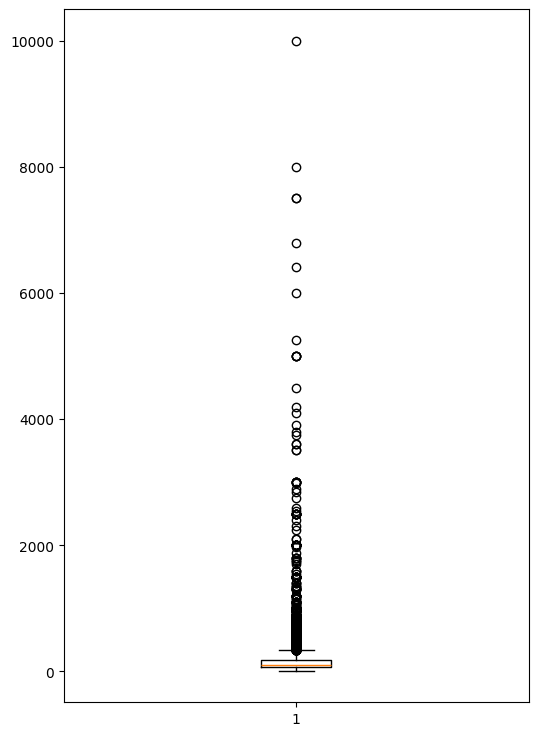

In [ ]:
plt.subplots(figsize=(6,9))
plt.boxplot(train['price'])

극도로 큰 값이 많아 데이터가 right-skewed 모양임 → 로그 변환 진행

<Axes: xlabel='price', ylabel='Count'>

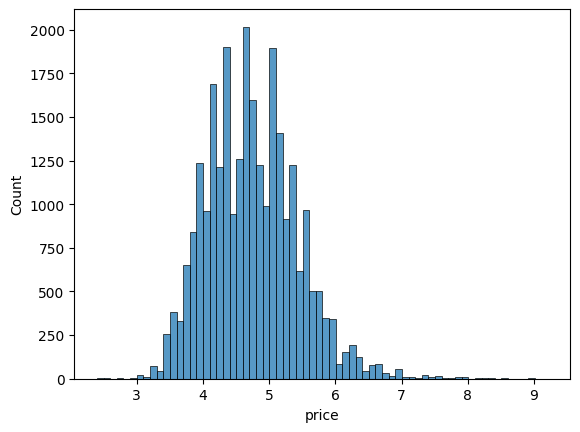

In [ ]:
# 로그 변환 결과 얼추 정규분포 모양을 따름
sns.histplot(np.log1p(train['price']), binwidth=0.1)

In [ ]:
# Q1, Q3 및 IQR 계산
Q1 = np.log1p(train['price']).quantile(0.25)  # 1사분위수
Q3 = np.log1p(train['price']).quantile(0.75)  # 3사분위수
IQR = Q3 - Q1  # IQR 계산

# 이상치 기준 설정
lower_bound = Q1 - 1.5 * IQR  # 하한
upper_bound = Q3 + 1.5 * IQR  # 상한

# 이상치를 제거한 데이터 생성
filtered_data = train[(np.log1p(train['price']) >= lower_bound) & (np.log1p(train['price']) <= upper_bound)]

# 결과 확인
print("제거 전 데이터 크기:", train.shape[0])
print("제거 후 데이터 크기:", filtered_data.shape[0])

제거 전 데이터 크기: 27371
제거 후 데이터 크기: 27033


<ipython-input-28-cbca4e51c827>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['price'] = np.log1p(train.price)


<Axes: ylabel='price'>

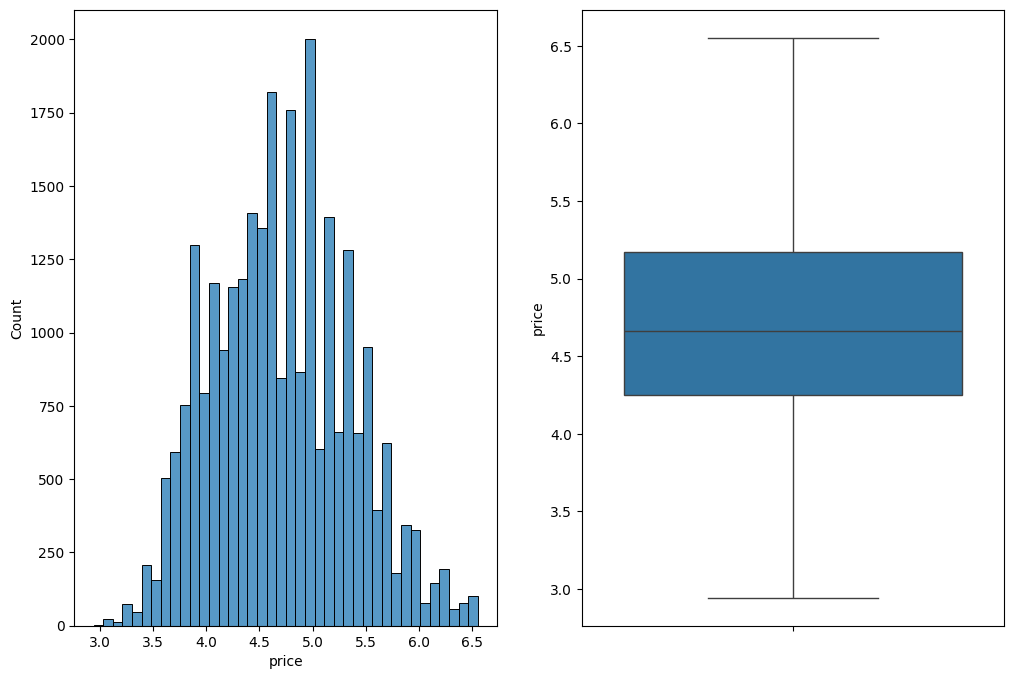

In [ ]:
# 원래 데이터 이상치 제거, 로그변환 진행
train = filtered_data
train['price'] = np.log1p(train.price)

# 최종 가격 데이터 분포 시각화
fig, axes = plt.subplots(1,2, figsize=(12,8))
sns.histplot(train.price, bins=40 ,ax=axes[0])
sns.boxplot(train.price, ax=axes[1])

### 7. minimum_nights

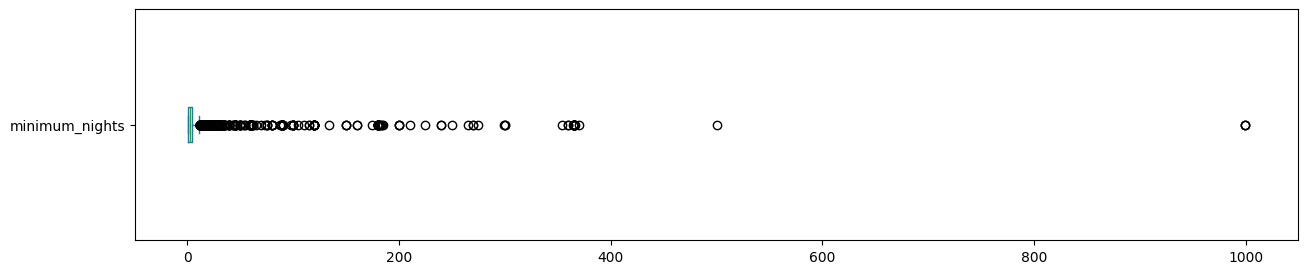

In [ ]:
# minimum_nights
train['minimum_nights'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

In [ ]:
# minimum_nights이 30일이 넘는 데이터의 수와 비율
print('Values over 30 nights: ')
print(len(train[train['minimum_nights'] > 30]))
print('{:.4f}%'.format((len(train[train['minimum_nights'] > 30]) / train.shape[0]) * 100))

Values over 30 nights: 
381
1.4094%


minimum_nights이 30일 이상인 에어비앤비 : 400개, 비율 : 1.4610%

- minimum_nights이 30일 이상인 데이터 삭제

In [ ]:
train = train[(train['minimum_nights'] <= 30)].copy()

<Axes: xlabel='minimum_nights', ylabel='Count'>

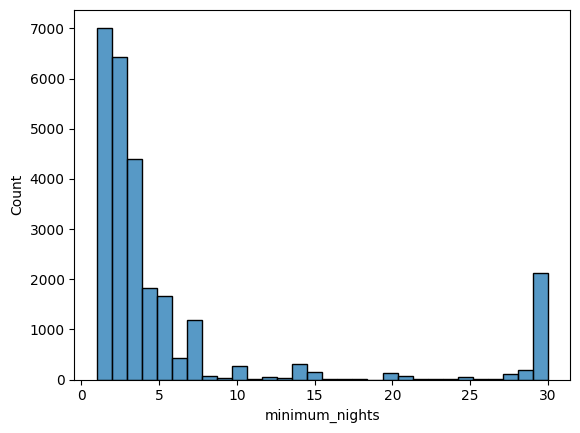

In [ ]:
sns.histplot(train['minimum_nights'], bins=30)

### 8. number_of_reviews

In [ ]:
train['number_of_reviews'].isnull().sum()

0

In [ ]:
train['number_of_reviews'].max()

607

In [ ]:
train['number_of_reviews'].min()

0

<Axes: xlabel='number_of_reviews', ylabel='Count'>

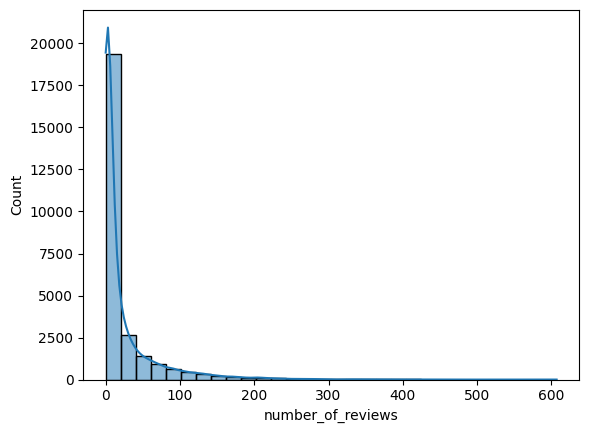

In [ ]:
sns.histplot(train['number_of_reviews'], bins=30, kde=True)

결측치 없음

0~607개 사이의 범위에서 리뷰 존재

확실히 리뷰가 적은 곳이 많고 리뷰 수가 많은 에어비앤비 수가 적어짐

### 9. calculated_host_listings_count

<Axes: >

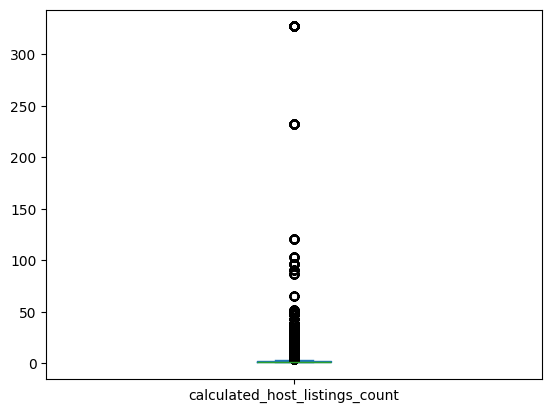

In [ ]:
train['calculated_host_listings_count'].plot(kind='box')

In [ ]:
# calculated_host_listings_count이 50이 넘는 데이터의 수와 비율
print(len(train[train['calculated_host_listings_count'] > 50]))
print('{:.4f}%'.format((len(train[train['calculated_host_listings_count'] > 50]) / train.shape[0]) * 100))

751
2.8178%


calculated_host_listings_count이 50개 이상인 에어비앤비 : 759개, 비율 : 2.7722%

In [ ]:
# calculated_host_listings_count이 5개 이하인 에어비앤비
print('{:.4f}%'.format((len(train[train['calculated_host_listings_count'] <= 5]) / train.shape[0]) * 100))

90.4060%


calculated_host_listings_count이 5개 이하인 데이터 : 90.2224% => 대부분을 차지함

In [ ]:
print('{:.4f}%'.format((len(train[train['calculated_host_listings_count'] == 1]) / train.shape[0]) * 100))
print('{:.4f}%'.format((len(train[train['calculated_host_listings_count'] == 2]) / train.shape[0]) * 100))
print('{:.4f}%'.format((len(train[train['calculated_host_listings_count'] == 3]) / train.shape[0]) * 100))

66.3740%
13.4774%
5.8345%


- calculated_host_listings_count이 50개 이상인 데이터 삭제

In [ ]:
train = train[(train['calculated_host_listings_count'] <= 50)].copy()

<Axes: xlabel='calculated_host_listings_count', ylabel='Count'>

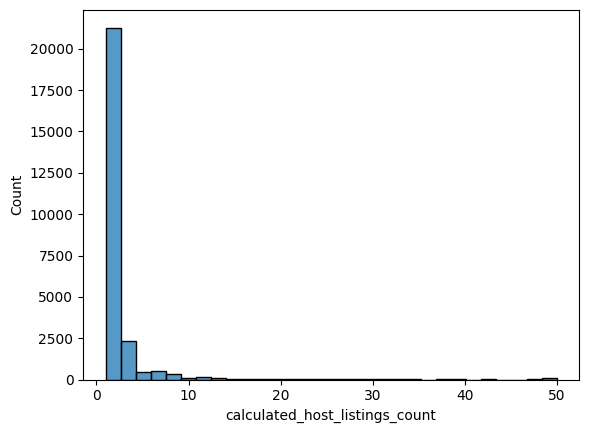

In [ ]:
sns.histplot(train['calculated_host_listings_count'], bins=30)

### 10. availability_365

<Axes: xlabel='availability_365', ylabel='Count'>

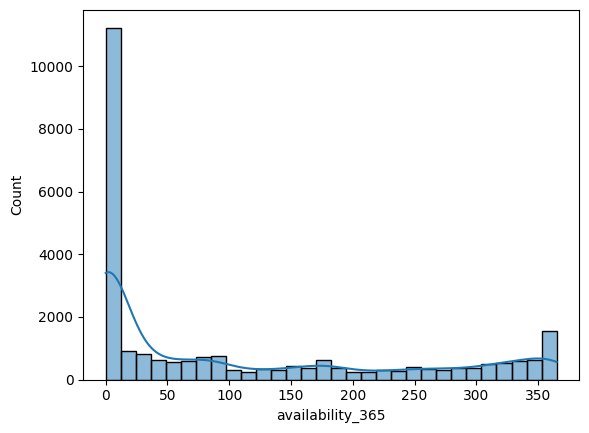

In [ ]:
sns.histplot(train['availability_365'], bins=30, kde=True)

In [ ]:
train[train['availability_365'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1,Clinton Hill Apartment Single Bedroom ! Pratt ~~,30610258,Santiago,Brooklyn,Clinton Hill,40.69591,-73.96284,Private room,4.077537,2,1,9/23/2018,0.10,1,0
3,4,15 min train ride to Times Sq and US OPEN,101602599,M,Queens,Woodside,40.74340,-73.90588,Entire home/apt,3.931826,1,95,6/24/2019,5.63,2,0
20,21,1 bedroom/1 Bath/Balcony/Wash-Dryer,42320409,Timothy,Brooklyn,Williamsburg,40.70760,-73.94072,Entire home/apt,4.477337,1,3,10/24/2015,0.07,1,0
22,23,Charming room Chinatown Manhattan,45951143,Alexandra,Manhattan,Chinatown,40.71319,-73.99265,Private room,4.615121,1,1,10/13/2015,0.02,1,0
25,26,Two Bedroom on the Upper East Side,80593607,Theodore,Manhattan,Upper East Side,40.77788,-73.95615,Entire home/apt,4.663439,1,3,8/23/2016,0.08,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27367,27368,Great little spot,164048400,Jarryd,Brooklyn,Bushwick,40.70167,-73.93075,Private room,3.713572,1,1,12/30/2017,0.05,1,0
27370,27371,Modern 1 Bedroom In Vibrant BK Neighborhood,10218689,Bere,Brooklyn,Crown Heights,40.67088,-73.95128,Entire home/apt,4.510860,4,26,6/19/2019,2.85,1,0
27372,27373,Bedroom on Quiet Block on the Lower East Side,29111684,Samuel,Manhattan,Lower East Side,40.72167,-73.99075,Private room,4.454347,30,2,3/20/2017,0.06,1,0
27374,27375,Dream home: Beautiful 2B2B Condo in Chelsea,106627653,Jacob,Manhattan,Chelsea,40.74735,-73.99974,Entire home/apt,6.373320,3,7,8/4/2018,0.23,1,0


In [ ]:
len(train[train['availability_365'] == 0])

9587

이용 가능한 일수가 0인 데이터 즉, 이용 불가능한 에어비앤비에 대한 데이터가 9746개로 꽤나 많음

In [ ]:
len(train[(train['availability_365'] == 0) & (train['number_of_reviews'] != 0)])

7013

In [ ]:
len(train[(train['availability_365'] == 0) & (train['number_of_reviews'] == 0)])

2574

number_of_reviews는 있지만 availability_365가 0인 데이터가 7089개 있음 → 이상치 같으니 다른 값으로 대체해보기

- room_type별 availability_365의 평균값을 구해 대체해보기

In [ ]:
# 1. availability_365가 0인 데이터와 아닌 데이터를 분리
df_zero_avail = train[train['availability_365'] == 0]  # 제외할 데이터
df_non_zero_avail = train[train['availability_365'] > 0]  # 분석할 데이터

# 2. room_type별 availability_365 평균 계산
room_type_avg = df_non_zero_avail.groupby('room_type')['availability_365'].mean()

# 3. availability_365가 0인 데이터의 값을 room_type별 평균으로 대체
df_zero_avail['availability_365'] = df_zero_avail['room_type'].map(room_type_avg)

# 4. 수정된 데이터 병합
train_update = pd.concat([df_non_zero_avail, df_zero_avail], ignore_index=True)

# 결과 출력
print("Room type별 평균 availability_365:")
print(room_type_avg)

Room type별 평균 availability_365:
room_type
Entire home/apt    159.755077
Private room       175.779646
Shared room        216.042918
Name: availability_365, dtype: float64


<ipython-input-48-85672b2c7e69>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zero_avail['availability_365'] = df_zero_avail['room_type'].map(room_type_avg)


In [ ]:
# 상관관계 계산 함수
def calculate_price_correlation(data, target_column='price'):
    correlations = {}
    for column in data.columns:
        if column != target_column and pd.api.types.is_numeric_dtype(data[column]):
            correlations[column] = data[column].corr(data[target_column])
    return correlations

# availability_365 열과 price 열 간의 상관관계 계산
availability_train_corr = train['availability_365'].corr(train['price'])
availability_train_update_corr = train_update['availability_365'].corr(train_update['price'])

# 결과 비교 출력
print("Train 데이터:", availability_train_corr)
print("Train_update 데이터:", availability_train_update_corr)

Train 데이터: 0.047101739320089875
Train_update 데이터: -0.0036643027662507394


원래 train 데이터에서의 상관관계가 높음

→ room_type별 평균 availability_365 값으로 대체하는 것은 좋은 방법 같지 않음

- availability_365의 값을 number_of_reviews 값으로 대체해보기

In [ ]:
# 원본 데이터프레임 복사
train_update2 = train.copy()

# 조건에 맞는 행의 availability_365 값을 number_of_reviews 값으로 대체
train_update2['availability_365'] = train_update2.loc[(train_update2['availability_365'] == 0) & (train_update2['number_of_reviews'] != 0), 'number_of_reviews']

In [ ]:
# 상관관계 계산 함수
def calculate_price_correlation(data, target_column='price'):
    correlations = {}
    for column in data.columns:
        if column != target_column and pd.api.types.is_numeric_dtype(data[column]):
            correlations[column] = data[column].corr(data[target_column])
    return correlations

# availability_365 열과 price 열 간의 상관관계 계산
availability_train_corr = train['availability_365'].corr(train['price'])
availability_train_update2_corr = train_update2['availability_365'].corr(train_update2['price'])

# 결과 비교 출력
print("Train 데이터:", availability_train_corr)
print("Train_update 데이터:", availability_train_update2_corr)

Train 데이터: 0.047101739320089875
Train_update 데이터: -0.018340482550297216


원래 train 데이터에서의 상관관계가 높음

→ availability_365의 값을 number_of_reviews 값으로 대체하는 것도 좋아보이지 않음

0값 전체 제거, 평균값으로 대체해보아도 모두 상관관계 값이 낮아지므로 따로 전처리 진행 안하는 것이 제일 좋은 것 같음

## EDA

### 1. 대도시일수록 리뷰 수가 많을 것이다.(neighbourhood_group이랑 number_of_reviews)

neighbourhood_group
Brooklyn         270634
Manhattan        246654
Queens            88014
Bronx             15664
Staten Island      6154
Name: number_of_reviews, dtype: int64


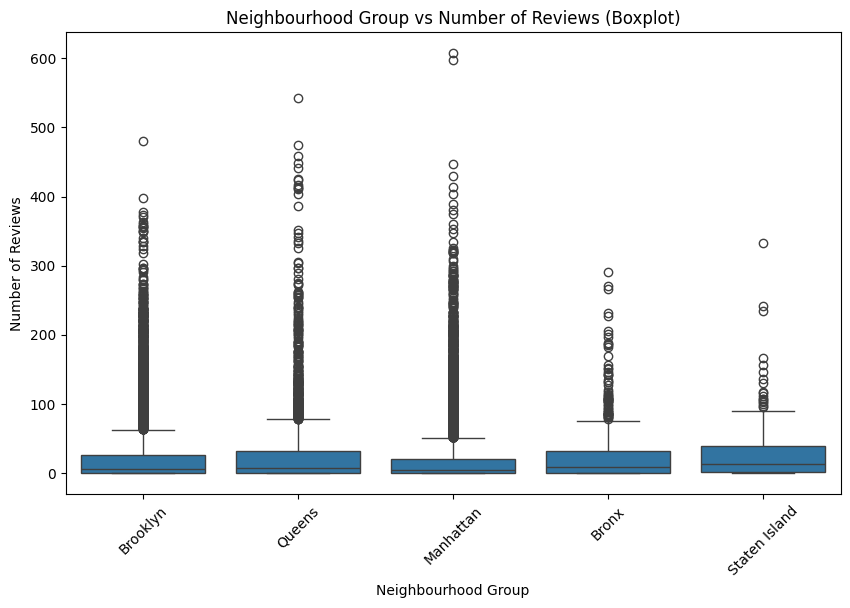

<ipython-input-52-5e77fe40f20d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_reviews.index, y=grouped_reviews.values, palette='viridis')


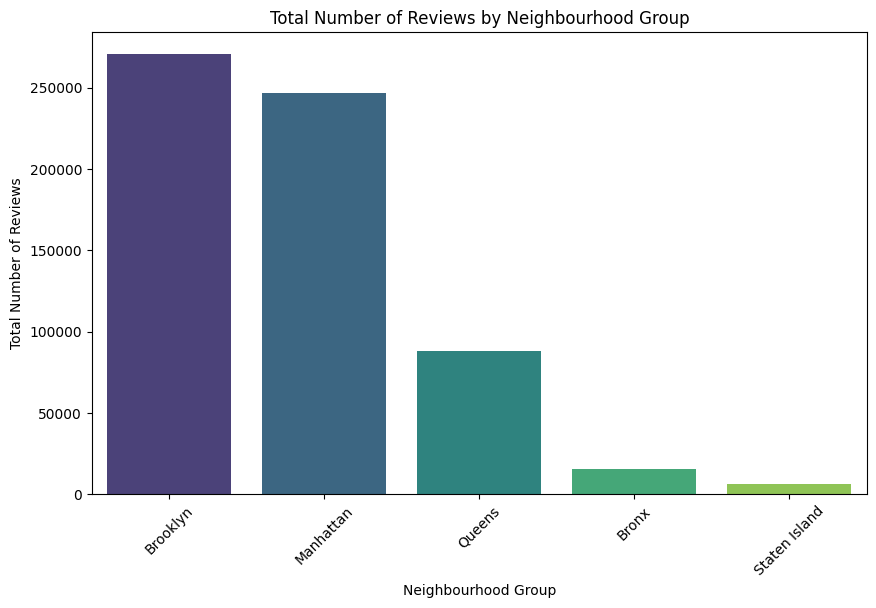

In [ ]:
# neighbourhood_group별 리뷰 수 통계
grouped_reviews = train.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False)
print(grouped_reviews)

# 시각화 - 바플롯 (리뷰 총합)
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_reviews.index, y=grouped_reviews.values, palette='viridis')
plt.title('Total Number of Reviews by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.show()

- Brooklyn이 리뷰 수에서 1위를 차지하고 Manhattan이 2위

- 인구 밀도가 가장 높은 Manhattan이 리뷰 수에서는 2위 →
단순히 인구 밀도만으로는 리뷰 수를 설명하기 어려움

- Queens는 인구 밀도 3위임에도 불구하고 Brooklyn과 Manhattan에 비해 리뷰 수가 현저히 적으며, Bronx와 Staten Island는 인구 밀도와 리뷰 수 모두 낮은 편

- 리뷰 수가 인구 밀도뿐만 아니라 관광지, 숙박업 활성화 정도, 지역의 매력도 등 다양한 요인에 영향을 받기 때문에 인구 밀도 순위와 리뷰 수 순위에 차이가 나타나는 것으로 보임

- 특히 Brooklyn은 문화적 다양성과 관광 명소, 숙소 밀집도가 높아 리뷰 수가 많고, Manhattan은 상업·비즈니스 중심지로 업무 방문 비중이 커 상대적으로 숙박 리뷰가 적을 가능성이 있음

- 그러나 전반적으로 대도시일수록 리뷰 수가 많다는 가설을 어느정도 뒷받침한다고 볼 수 있다

### 2. 위도,경도로 위치 분류 후 구한 평균 가격과 지역구별로 분류 후 평균 가격 비교가 동일할 것이다.(지역구와 위도,경도 사이에 잘못 연결된 값이 있는지 없는지 확인 가능, 지역구 별로 어디가 비싸고 싼지 파악 가능)

In [ ]:
# 지역구별 위도와 경도 범위 정의
region_bounds = {
    'Manhattan': {'lat_min': 40.70, 'lat_max': 40.88, 'lon_min': -74.02, 'lon_max': -73.92},
    'Brooklyn': {'lat_min': 40.57, 'lat_max': 40.73, 'lon_min': -74.04, 'lon_max': -73.85},
    'Queens': {'lat_min': 40.54, 'lat_max': 40.79, 'lon_min': -73.96, 'lon_max': -73.70},
    'Bronx': {'lat_min': 40.79, 'lat_max': 40.91, 'lon_min': -73.93, 'lon_max': -73.76},
    'Staten Island': {'lat_min': 40.50, 'lat_max': 40.65, 'lon_min': -74.25, 'lon_max': -74.05}
}

# 위도, 경도 기준으로 지역구 분류 함수
def assign_region(row):
    lat, lon = row['latitude'], row['longitude']
    for region, bounds in region_bounds.items():
        if bounds['lat_min'] <= lat <= bounds['lat_max'] and bounds['lon_min'] <= lon <= bounds['lon_max']:
            return region
    return 'Unknown'  # 해당되지 않는 경우

# 적용
train['predicted_neighbourhood_group'] = train.apply(assign_region, axis=1)

# 실제 지역구와 예측 지역구 비교
comparison = pd.crosstab(train['neighbourhood_group'], train['predicted_neighbourhood_group'])
print("실제 지역구 vs 예측 지역구 분포:\n", comparison)

실제 지역구 vs 예측 지역구 분포:
 predicted_neighbourhood_group  Bronx  Brooklyn  Manhattan  Queens  \
neighbourhood_group                                                 
Bronx                            515         0         80       0   
Brooklyn                           0      7925       3075       0   
Manhattan                         33         0      10964       0   
Queens                             3       452        641    2015   
Staten Island                      0         0          0       0   

predicted_neighbourhood_group  Staten Island  Unknown  
neighbourhood_group                                    
Bronx                                      0        1  
Brooklyn                                   0        0  
Manhattan                                  0        0  
Queens                                     0        0  
Staten Island                            197        0  


분포 정확도:

- Manhattan, Staten Island는 예측이 매우 정확

- Bronx, Brooklyn, Queens는 일부 혼동이 발생하며, 특히 Brooklyn → Manhattan 예측 오류가 큼(3075건)

- Bronx 데이터 중 1건이 Unknown으로 분류됨

<ipython-input-86-3fe4185ea02d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train['price_original'] = np.exp(filtered_train['price'])


neighbourhood_group
Bronx             86.645378
Brooklyn         115.953818
Manhattan        167.705101
Queens            95.023144
Staten Island     99.263959
Name: price_original, dtype: float64
predicted_neighbourhood_group
Bronx             85.655172
Brooklyn         107.384505
Manhattan        158.040379
Queens            93.044169
Staten Island     99.263959
Name: price_original, dtype: float64


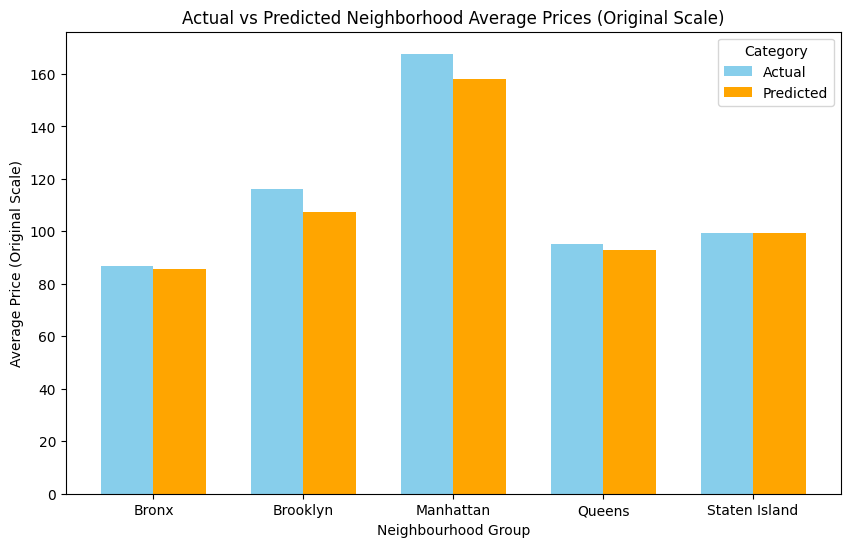

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Unknown 제거
filtered_train = train[train['predicted_neighbourhood_group'] != 'Unknown']

# 로그 변환된 가격을 복원
filtered_train['price_original'] = np.exp(filtered_train['price'])

# 실제 지역구 기준 평균 가격 복원
actual_avg_price = (
    filtered_train.groupby('neighbourhood_group')['price_original'].mean()
)
print(actual_avg_price)

# 예측 지역구 기준 평균 가격 복원
predicted_avg_price = (
    filtered_train.groupby('predicted_neighbourhood_group')['price_original'].mean()
)
print(predicted_avg_price)

# 데이터프레임으로 결합
comparison_train = pd.DataFrame({
    'Neighbourhood Group': actual_avg_price.index,
    'Actual': actual_avg_price.values,
    'Predicted': predicted_avg_price.values
})

# 시각화: 실제 vs 예측 평균 가격
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(comparison_train))

plt.bar(x, comparison_train['Actual'], width=bar_width, label='Actual', color='skyblue')
plt.bar([p + bar_width for p in x], comparison_train['Predicted'], width=bar_width, label='Predicted', color='orange')

plt.xticks([p + bar_width / 2 for p in x], comparison_train['Neighbourhood Group'])
plt.title('Actual vs Predicted Neighborhood Average Prices (Original Scale)')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price (Original Scale)')
plt.legend(title='Category')
plt.show()

지역구 별 평균 가격 비교

Bronx

- 실제 가격: $86.65

- 가장 저렴한 지역으로, 주로 저렴한 숙소와 주거지가 분포

- 예측 가격: $85.66

- 실제보다 약간 낮게 예측되었으나, 모델이 Bronx의 저렴한 특성을 대체로 잘 반영

Brooklyn

- 실제 가격: $115.95

- 다양한 가격대의 숙소가 혼재된 지역으로, Bronx보다 높은 가격대를 형성

- 예측 가격: $107.38

- 실제보다 약간 낮게 예측함 특히 고가 숙소 데이터를 과소평가한 것으로 보임

Manhattan

- 실제 가격: $167.71

- 평균 가격이 가장 높은 지역으로 비즈니스 및 관광 중심지로 인해 높은 가격대를 형성

- 예측 가격: $158.04

- 실제보다 낮게 예측된 것을 통해 고가 숙소 데이터의 분포를 과소평가했을 가능성이 있지만 여전히 가장 높은 평균 가격을 유지

Queens

- 실제 가격: $95.02

- Bronx와 Brooklyn의 중간 가격대로, 주거 중심의 지역

- 예측 가격: $93.04

- 실제와 유사하게 예측되었으며, Queens의 특성을 대체로 잘 반영함

Staten Island

- 실제 가격: $99.26

- 접근성이 제한적이나 조용한 분위기를 선호하는 사람들이 선택하는 지역

- 예측 가격: $99.26

- 실제와 예측이 정확히 일치한 것을 통해 모델이 Staten Island의 특성을 완벽히 학습한 것을 알 수 있음

**추가적으로 진행한 탐구**

Unknown으로 분리된 1개의 데이터 위치 파악해보기

In [ ]:
import folium
from folium import features
import matplotlib.pyplot as plt

# 지도 생성 (뉴욕시 중심 좌표 설정)
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# 지역구 경계를 선으로 추가
for region, bounds in region_bounds.items():
    # 각 지역의 경계를 좌표 형태로 정의
    boundary_coordinates = [
        [bounds['lat_min'], bounds['lon_min']],
        [bounds['lat_min'], bounds['lon_max']],
        [bounds['lat_max'], bounds['lon_max']],
        [bounds['lat_max'], bounds['lon_min']],
        [bounds['lat_min'], bounds['lon_min']],  # 경계 닫기
    ]

    # 선으로 지도에 추가
    folium.PolyLine(
        boundary_coordinates,
        color='blue',
        weight=2,
        opacity=0.7,
        tooltip=region
    ).add_to(nyc_map)

# Unknown 데이터를 점으로 추가
unknown_data = train[train['predicted_neighbourhood_group'] == 'Unknown']
for _, row in unknown_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        tooltip=f"Lat: {row['latitude']}, Lon: {row['longitude']}"
    ).add_to(nyc_map)

# 지도 출력
nyc_map

neighboorhood_group에서 Bronx로 데이터가 입력 되어 있었는데 예측 모델로 설정한 범위보다 아주 근사한 차이로 위에 존재함을 확인할 수 있었음